## SC2001 lab3 Dynamic Programming

#### (1) Give a recursive definition of the function P(C).
$$
P(C) =
\begin{cases}
0 & \text{if } C = 0 \\\\
\max\{P(C - w_i) + p_i \mid C \geq w_i\} & \text{if } C > 0
\end{cases}
$$



In [1]:
def P_recursive(C, weights, profits):
    if C == 0:
        return 0
    
    max_profit = 0
    for i in range(len(weights)):
        if weights[i] <= C:
            profit = P_recursive(C - weights[i], weights, profits) + profits[i]
            max_profit = max(max_profit, profit)
    
    return max_profit


In [2]:
def P_recursive_memo(C, weights, profits, memo=None):
    if memo is None:
        memo = {}

    if C in memo:
        return memo[C]

    if C == 0:
        return 0

    max_profit = 0
    for i in range(len(weights)):
        if weights[i] <= C:
            profit = P_recursive_memo(C - weights[i], weights, profits, memo) + profits[i]
            max_profit = max(max_profit, profit)

    memo[C] = max_profit
    return max_profit


In [3]:
def P_recursive_test():
    # case (a): weights = [4, 6, 8], profits = [7, 6, 9]
    weights = [4, 6, 8]
    profits = [7, 6, 9]
    C = 14

    print("P(14) recursive result (case a):", P_recursive(C, weights, profits))
    result2 = P_recursive_memo(C, weights, profits)
    print("P(14) with memoization (case a):", result2)

P_recursive_test()

P(14) recursive result (case a): 21
P(14) with memoization (case a): 21


(2) Draw the subproblem graph for \( P(14) \) where \( n = 3 \), with the weights and profits given below.

| \( i \) | 0 | 1 | 2 |
|--------|---|---|---|
| \( w_i \) | 4 | 6 | 8 |
| \( p_i \) | 7 | 6 | 9 |


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

def build_subproblem_graph(C, weights):
    G = nx.DiGraph()
    visited = set()

    def dfs(c):
        if c in visited:
            return
        visited.add(c)

        for i, w in enumerate(weights):
            if w <= c:
                next_c = c - w
                G.add_edge(f"P({c})", f"P({next_c})", label=f"-{w}")
                dfs(next_c)

    dfs(C)
    return G

def draw_subproblem_graph(G):
    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'label')

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title("Subproblem Graph for P(14)")
    plt.show()


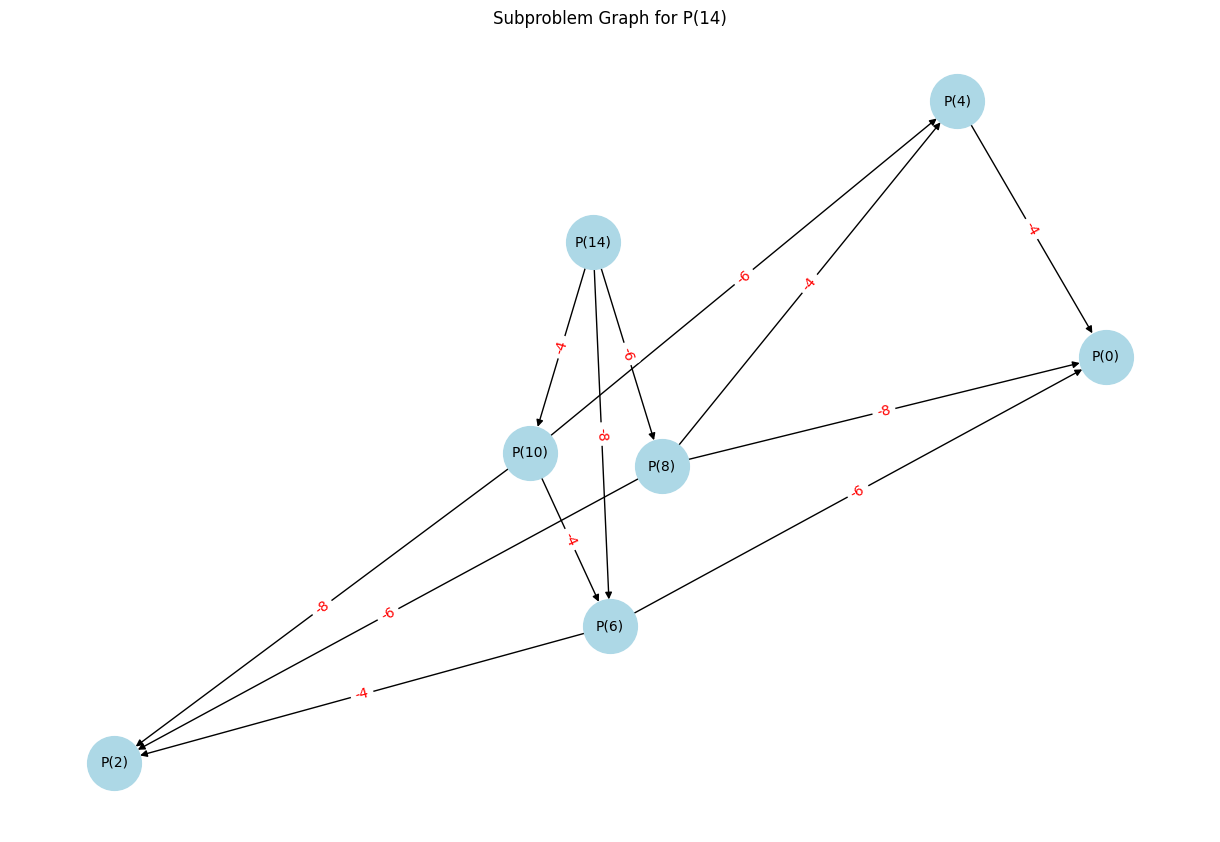

In [6]:
def graph_test():
    weights = [4, 6, 8]
    C = 14

    G = build_subproblem_graph(C, weights)
    draw_subproblem_graph(G)

graph_test()

(3) Give a dynamic programming algorithm to compute the maximum profit, given a knapsack of capacity $C$, $n$ types of objects with weights $w_i$ and profits $p_i$ using the bottom - up approach. 

In [7]:
def unbounded_knapsack(C, weights, profits):
    n = len(weights)
    dp = [0] * (C + 1)

    for c in range(1, C + 1):
        for i in range(n):
            if weights[i] <= c:
                dp[c] = max(dp[c], dp[c - weights[i]] + profits[i])

    return dp[C]


(4a). show the running result of P(14) with weights and profits given in (2).

|  | 0 | 1 | 2 |
| --- | --- | --- | --- |
| $w_i$ | 5 | 6 | 8 |
| $p_i$ | 7 | 6 | 9 | 

(4b). Show the running result of P(14) with weights and profits given below.

|  | 0 | 1 | 2 |
| --- | --- | --- | --- |
| $w_i$ | 5 | 6 | 8 |
| $p_i$ | 7 | 6 | 9 | 

In [8]:
def unbounded_knapsack_test():
    # Case (a)
    weights_a = [4, 6, 8]
    profits_a = [7, 6, 9]
    C = 14
    print("Max profit for C=14, case (a):", unbounded_knapsack(C, weights_a, profits_a))

    # Case (b)
    weights_b = [5, 6, 8]
    profits_b = [7, 6, 9]
    print("Max profit for C=14, case (b):", unbounded_knapsack(C, weights_b, profits_b))

unbounded_knapsack_test()

Max profit for C=14, case (a): 21
Max profit for C=14, case (b): 16
